Phân tích đại học bách khoa hà nội 



In [63]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from facebook_scraper import get_profile

In [64]:
raw_df =  pd.read_csv('/workspaces/22022546_T--Nguy-n-D-ng/Data/ktqdNEU.csv')
raw_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 114 entries, 0 to 113
Data columns (total 53 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   post_id                        114 non-null    int64  
 1   text                           113 non-null    object 
 2   post_text                      96 non-null     object 
 3   shared_text                    18 non-null     object 
 4   original_text                  0 non-null      float64
 5   time                           114 non-null    object 
 6   timestamp                      114 non-null    int64  
 7   image                          77 non-null     object 
 8   image_lowquality               114 non-null    object 
 9   images                         114 non-null    object 
 10  images_description             114 non-null    object 
 11  images_lowquality              114 non-null    object 
 12  images_lowquality_description  114 non-null    obj

CLEANING DATA

In [65]:
used_data = raw_df[['post_id','post_text','text','time','images_description','comments','shares','comments_full','reactors','reactions','reaction_count','was_live']]
used_data

,post_id,post_text,text,time,images_description,comments,shares,comments_full,reactors,reactions,reaction_count,was_live
0,732948108863591,"Thư viện điện tử 11 triệu USD, triệu cuốn sách...","Thư viện điện tử 11 triệu USD, triệu cuốn sách...",2023-11-25 11:25:19,"['May be an image of text', 'May be an image o...",175,77,"[{'comment_id': '648537020689218', 'comment_ur...",[],"{'like': 1123, 'love': 382, 'haha': 4, 'wow': ...",1542,False
1,323743073790793,NaN,"SUN, NOV 26\nChương trình trải nghiệm: 1 ngày ...",2023-11-24 10:31:29,[],628,0,[],NaN,NaN,1300,False
2,732286135596455,Trường Đại học Kinh tế Quốc dân tổ chức thành ...,Trường Đại học Kinh tế Quốc dân tổ chức thành ...,2023-11-24 07:07:41,"[""May be an image of 1 person, dais and text t...",0,0,[],"[{'name': 'Lê Quang Mênhh', 'link': 'https://f...","{'like': 82, 'love': 7}",89,False
3,730862365738832,CHÚC MỪNG PGS.TS. LÊ THANH HÀ - KHOA KINH TẾ H...,CHÚC MỪNG PGS.TS. LÊ THANH HÀ - KHOA KINH TẾ H...,2023-11-21 14:17:08,[],55,22,"[{'comment_id': '250924264662383', 'comment_ur...","[{'name': 'Thùy Linh', 'link': 'https://facebo...","{'like': 840, 'love': 364, 'wow': 12, 'care': 11}",1227,False
4,730382429120159,Ngày 20/11 hàng năm không chỉ là dịp để tri ân...,Ngày 20/11 hàng năm không chỉ là dịp để tri ân...,2023-11-20 16:02:01,"['May be an image of 15 people and text', 'May...",1,8,[],"[{'name': 'Bao Thanh Thien', 'link': 'https://...","{'like': 872, 'love': 431, 'care': 11}",1314,False
...,...,...,...,...,...,...,...,...,...,...,...,...
109,676193010732292,LỄ TỐT NGHIỆP ĐẠI HỌC CHÍNH QUY NĂM 2023 ( PHI...,LỄ TỐT NGHIỆP ĐẠI HỌC CHÍNH QUY NĂM 2023 ( PHI...,2023-08-27 00:00:07,[],220,72,"[{'comment_id': '1354054158850753', 'comment_u...","[{'name': 'Mai Trang', 'link': 'https://facebo...","{'like': 656, 'love': 244, 'haha': 2, 'wow': 1...",907,True
110,1270136470311946,LỄ TỐT NGHIỆP ĐẠI HỌC CHÍNH QUY NĂM 2023 ( PHI...,LỄ TỐT NGHIỆP ĐẠI HỌC CHÍNH QUY NĂM 2023 ( PHI...,2023-08-26 05:59:52,[],111,48,"[{'comment_id': '643658751072857', 'comment_ur...","[{'name': 'Phan Kim Nhã', 'link': 'https://fac...","{'like': 193, 'love': 124, 'care': 3}",320,True
111,1237176660290613,NaN,"SAT, AUG 26\nLỄ TỐT NGHIỆP ĐẠI HỌC CHÍNH QUY N...",2023-08-26 05:36:06,[],5,0,[],NaN,NaN,218,True
112,1358907194696015,LỄ TỐT NGHIỆP ĐẠI HỌC CHÍNH QUY NĂM 2023 ( PHI...,LỄ TỐT NGHIỆP ĐẠI HỌC CHÍNH QUY NĂM 2023 ( PHI...,2023-08-26 00:01:04,[],988,272,"[{'comment_id': '823626852603976', 'comment_ur...","[{'name': 'Quang Thao Phan', 'link': 'https://...","{'like': 2804, 'love': 1257, 'haha': 12, 'wow'...",4105,True


In [66]:
cleaned_data = used_data.fillna({ "post_text" : "No post text"})
def replace_empty_string(value):
    return value if ((isinstance(value, str)) and (value != '[]')) else 'No photo description available'
def replace_empty_comment(cm):
    return cm if ((isinstance(cm, str)) and (cm != '[]')) else 'No comment available'
def replace_empty_reactors(r):
    if (len(str(r)) > 4):
        return r
    else: 
        return 'No reactors available'

def reset_reaction_count(rc):
    for i in range(len(rc)):
        if pd.isnull(cleaned_data['reactions'][i]):
             cleaned_data.loc[i, 'reactions'] = "{'like': " + str(cleaned_data['reaction_count'][i]) + ",'love': 0, 'haha': 0, 'wow': 0, 'care': 0, 'sad': 0, 'angry': 0}"
       
cleaned_data["images_description"] = cleaned_data["images_description"].apply(replace_empty_string)
cleaned_data["comments_full"] = cleaned_data["comments_full"].apply(replace_empty_comment)
cleaned_data["reactors"] = cleaned_data["reactors"].apply(replace_empty_reactors)
reset_reaction_count(cleaned_data)
cleaned_data

,post_id,post_text,text,time,images_description,comments,shares,comments_full,reactors,reactions,reaction_count,was_live
0,732948108863591,"Thư viện điện tử 11 triệu USD, triệu cuốn sách...","Thư viện điện tử 11 triệu USD, triệu cuốn sách...",2023-11-25 11:25:19,"['May be an image of text', 'May be an image o...",175,77,"[{'comment_id': '648537020689218', 'comment_ur...",No reactors available,"{'like': 1123, 'love': 382, 'haha': 4, 'wow': ...",1542,False
1,323743073790793,No post text,"SUN, NOV 26\nChương trình trải nghiệm: 1 ngày ...",2023-11-24 10:31:29,No photo description available,628,0,No comment available,No reactors available,"{'like': 1300,'love': 0, 'haha': 0, 'wow': 0, ...",1300,False
2,732286135596455,Trường Đại học Kinh tế Quốc dân tổ chức thành ...,Trường Đại học Kinh tế Quốc dân tổ chức thành ...,2023-11-24 07:07:41,"[""May be an image of 1 person, dais and text t...",0,0,No comment available,"[{'name': 'Lê Quang Mênhh', 'link': 'https://f...","{'like': 82, 'love': 7}",89,False
3,730862365738832,CHÚC MỪNG PGS.TS. LÊ THANH HÀ - KHOA KINH TẾ H...,CHÚC MỪNG PGS.TS. LÊ THANH HÀ - KHOA KINH TẾ H...,2023-11-21 14:17:08,No photo description available,55,22,"[{'comment_id': '250924264662383', 'comment_ur...","[{'name': 'Thùy Linh', 'link': 'https://facebo...","{'like': 840, 'love': 364, 'wow': 12, 'care': 11}",1227,False
4,730382429120159,Ngày 20/11 hàng năm không chỉ là dịp để tri ân...,Ngày 20/11 hàng năm không chỉ là dịp để tri ân...,2023-11-20 16:02:01,"['May be an image of 15 people and text', 'May...",1,8,No comment available,"[{'name': 'Bao Thanh Thien', 'link': 'https://...","{'like': 872, 'love': 431, 'care': 11}",1314,False
...,...,...,...,...,...,...,...,...,...,...,...,...
109,676193010732292,LỄ TỐT NGHIỆP ĐẠI HỌC CHÍNH QUY NĂM 2023 ( PHI...,LỄ TỐT NGHIỆP ĐẠI HỌC CHÍNH QUY NĂM 2023 ( PHI...,2023-08-27 00:00:07,No photo description available,220,72,"[{'comment_id': '1354054158850753', 'comment_u...","[{'name': 'Mai Trang', 'link': 'https://facebo...","{'like': 656, 'love': 244, 'haha': 2, 'wow': 1...",907,True
110,1270136470311946,LỄ TỐT NGHIỆP ĐẠI HỌC CHÍNH QUY NĂM 2023 ( PHI...,LỄ TỐT NGHIỆP ĐẠI HỌC CHÍNH QUY NĂM 2023 ( PHI...,2023-08-26 05:59:52,No photo description available,111,48,"[{'comment_id': '643658751072857', 'comment_ur...","[{'name': 'Phan Kim Nhã', 'link': 'https://fac...","{'like': 193, 'love': 124, 'care': 3}",320,True
111,1237176660290613,No post text,"SAT, AUG 26\nLỄ TỐT NGHIỆP ĐẠI HỌC CHÍNH QUY N...",2023-08-26 05:36:06,No photo description available,5,0,No comment available,No reactors available,"{'like': 218,'love': 0, 'haha': 0, 'wow': 0, '...",218,True
112,1358907194696015,LỄ TỐT NGHIỆP ĐẠI HỌC CHÍNH QUY NĂM 2023 ( PHI...,LỄ TỐT NGHIỆP ĐẠI HỌC CHÍNH QUY NĂM 2023 ( PHI...,2023-08-26 00:01:04,No photo description available,988,272,"[{'comment_id': '823626852603976', 'comment_ur...","[{'name': 'Quang Thao Phan', 'link': 'https://...","{'like': 2804, 'love': 1257, 'haha': 12, 'wow'...",4105,True


Prepare data

In [67]:
month = []
hour = []
days = []
Date = []
Time = []
for i in range(len(cleaned_data)):
    t = cleaned_data['time'][i].split(" ")
    p_time = t[1].split(":")
    p_date = t[0].split("-")
    Time.append(t[1])
    Date.append(t[0])
    month.append(int(p_date[1]))
    hour.append(int(p_time[0]))
    days.append(p_date[2])
cleaned_data['Day'] = days
cleaned_data['Month'] = month
cleaned_data['Date'] = Date
cleaned_data['Time'] = Time
cleaned_data['Hour'] = hour   
cleaned_data = cleaned_data.drop(columns='time')

In [68]:
import ast
thich = []
yeu_thich = []
haha = []
wow = []
thuong_thuong = []
buon = []
phan_no = []
for i in range(len(cleaned_data)):
     if ((cleaned_data['reaction_count'][i] != 0)):
            dictionary_result = ast.literal_eval(cleaned_data['reactions'][i])
            so_luot_thich = dictionary_result.get('thích', 0) + dictionary_result.get('like',0)
            so_yeu_thich = dictionary_result.get('yêu thích', 0) + dictionary_result.get('love', 0)
            so_haha = dictionary_result.get('haha', 0)
            so_wow = dictionary_result.get('wow',0)
            so_thuong_thuong = dictionary_result.get('thương thương',0) +dictionary_result.get('care', 0)
            so_buon = dictionary_result.get('buồn', 0) + dictionary_result.get('sad', 0)
            so_phan_no = dictionary_result.get('phẫn nộ',0) + dictionary_result.get('angry', 0)
            thich.append(so_luot_thich)
            yeu_thich.append(so_yeu_thich)
            haha.append(so_haha)
            wow.append(so_wow)
            thuong_thuong.append(so_thuong_thuong)
            buon.append(so_buon)
            phan_no.append(so_phan_no)
     else:
            thich.append(0)
            yeu_thich.append(0)
            haha.append(0)
            wow.append(0)
            thuong_thuong.append(0)
            buon.append(0)
            phan_no.append(0)

In [69]:
cleaned_data['Thích'] = thich
cleaned_data['Yêu_thích'] = yeu_thich
cleaned_data['Haha'] = haha
cleaned_data['Wow'] = wow
cleaned_data['Thương_thương'] = thuong_thuong
cleaned_data['Buồn'] = buon
cleaned_data['Phẫn_nộ'] = phan_no

In [70]:
sorted_data = cleaned_data.sort_values(by = 'reaction_count', ascending=False)
sorted_data

,post_id,post_text,text,images_description,comments,shares,comments_full,reactors,reactions,reaction_count,...,Date,Time,Hour,Thích,Yêu_thích,Haha,Wow,Thương_thương,Buồn,Phẫn_nộ
95,685739823584420,No post text,NaN,['May be an image of text'],114,18,"[{'comment_id': '6464439700339100', 'comment_u...","[{'name': 'Dương Ngọc Lan', 'link': 'https://f...","{'like': 4753, 'love': 1771, 'haha': 26, 'wow'...",6617,...,2023-09-06,03:24:12,3,4753,1771,26,7,44,15,1
44,712447980913604,CHÚC MỪNG NGÀY PHỤ NỮ VIỆT NAM 20/10\n\n🌺 Nhân...,CHÚC MỪNG NGÀY PHỤ NỮ VIỆT NAM 20/10\n\n🌺 Nhân...,"[""May be an image of text that says 'NH CONICN...",361,132,"[{'comment_id': '822701516273487', 'comment_ur...","[{'name': 'Danh Minh', 'link': 'https://facebo...","{'like': 3136, 'love': 2334, 'haha': 34, 'wow'...",5606,...,2023-10-20,01:00:09,1,3136,2334,34,16,78,8,0
107,680243077467428,"Nam thanh, Nữ tú rạng ngời trong Lễ tốt nghiệp...","Nam thanh, Nữ tú rạng ngời trong Lễ tốt nghiệp...","['No photo description available.', 'No photo ...",164,45,"[{'comment_id': '1434628217117936', 'comment_u...","[{'name': 'Chu Mạnh', 'link': 'https://faceboo...","{'like': 4056, 'love': 1328, 'haha': 9, 'wow':...",5420,...,2023-08-27,14:31:57,14,4056,1328,9,2,22,3,0
112,1358907194696015,LỄ TỐT NGHIỆP ĐẠI HỌC CHÍNH QUY NĂM 2023 ( PHI...,LỄ TỐT NGHIỆP ĐẠI HỌC CHÍNH QUY NĂM 2023 ( PHI...,No photo description available,988,272,"[{'comment_id': '823626852603976', 'comment_ur...","[{'name': 'Quang Thao Phan', 'link': 'https://...","{'like': 2804, 'love': 1257, 'haha': 12, 'wow'...",4105,...,2023-08-26,00:01:04,0,2804,1257,12,9,21,1,1
48,906959070527185,No post text,"WED, OCT 18\nGặp gỡ tháng 10",No photo description available,941,0,No comment available,No reactors available,"{'like': 3900,'love': 0, 'haha': 0, 'wow': 0, ...",3900,...,2023-10-16,12:52:54,12,3900,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31,719593830199019,Hội thảo khoa học “Những vấn đề đặt ra trong đ...,Hội thảo khoa học “Những vấn đề đặt ra trong đ...,"[""May be an image of 1 person, newsroom and te...",2,0,No comment available,"[{'name': 'Phạm Thị Loan', 'link': 'https://fa...","{'like': 59, 'love': 4, 'care': 1}",64,...,2023-11-01,06:32:35,6,59,4,0,0,1,0,0
40,253516003971426,No post text,"THU, OCT 26\nHTKHQG: THÚC ĐẨY SỰ KẾT NỐI, PHỔ ...",No photo description available,0,0,No comment available,No reactors available,"{'like': 62,'love': 0, 'haha': 0, 'wow': 0, 'c...",62,...,2023-10-25,14:52:23,14,62,0,0,0,0,0,0
30,720199276805141,Trường Đại học Kinh tế Quốc dân đồng hành cùng...,Trường Đại học Kinh tế Quốc dân đồng hành cùng...,"['May be an image of 1 person, newsroom and te...",0,1,No comment available,"[{'name': 'Lê Quang Mênhh', 'link': 'https://f...","{'like': 58, 'love': 4}",62,...,2023-11-02,08:58:48,8,58,4,0,0,0,0,0
71,697711545720581,Hướng dẫn sử dụng tài nguyên điện tử Tạp chí K...,Hướng dẫn sử dụng tài nguyên điện tử Tạp chí K...,No photo description available,1,6,No comment available,"[{'name': 'Nguyễn Huy Sao', 'link': 'https://f...","{'like': 49, 'love': 10}",59,...,2023-09-26,03:30:40,3,49,10,0,0,0,0,0


Các thuộc tính của dữ liệu

In [71]:
cleaned_data.columns

Index(['post_id', 'post_text', 'text', 'images_description', 'comments',
       'shares', 'comments_full', 'reactors', 'reactions', 'reaction_count',
       'was_live', 'Day', 'Month', 'Date', 'Time', 'Hour', 'Thích',
       'Yêu_thích', 'Haha', 'Wow', 'Thương_thương', 'Buồn', 'Phẫn_nộ'],
      dtype='object')

ANALYSE DATA

Tổng số lượng, tỷ lệ, trung bình các reaction trong các bài viết 

In [72]:
s = pd.DataFrame({'Số lượng': [sum(thich),sum(yeu_thich),sum(haha),sum(wow),sum(thuong_thuong),sum(buon),sum(phan_no)],
                  'Phần trăm (%)': [(sum(thich)/sum(raw_df['reaction_count']))*100,
                                   (sum(yeu_thich)/sum(raw_df['reaction_count']))*100,
                                   (sum(haha)/sum(raw_df['reaction_count']))*100,
                                   (sum(wow)/sum(raw_df['reaction_count']))*100,
                                   (sum(thuong_thuong)/sum(raw_df['reaction_count']))*100,
                                   (sum(buon)/sum(raw_df['reaction_count']))*100,
                                   (sum(phan_no)/sum(raw_df['reaction_count']))*100],
                    'Trung bình/bài đăng' : [cleaned_data['Thích'].mean(), cleaned_data['Yêu_thích'].mean(),
                                    cleaned_data['Haha'].mean(), cleaned_data["Wow"].mean(),
                                    cleaned_data['Thương_thương'].mean(), cleaned_data['Buồn'].mean(), cleaned_data['Phẫn_nộ'].mean()]
                                    })
s.index = ['Thích','Yêu thích','Haha','Wow','Thương thương','Buồn','Phẫn nộ']
s

,Số lượng,Phần trăm (%),Trung bình/bài đăng
Thích,70865,73.510648,621.622807
Yêu thích,21455,22.255993,188.201754
Haha,2154,2.234417,18.894737
Wow,215,0.223027,1.885965
Thương thương,709,0.735470,6.219298
Buồn,997,1.034222,8.745614
Phẫn nộ,6,0.006224,0.052632


Vẽ biểu đồ


<Axes: xlabel='Reactions', ylabel='Percentage'>

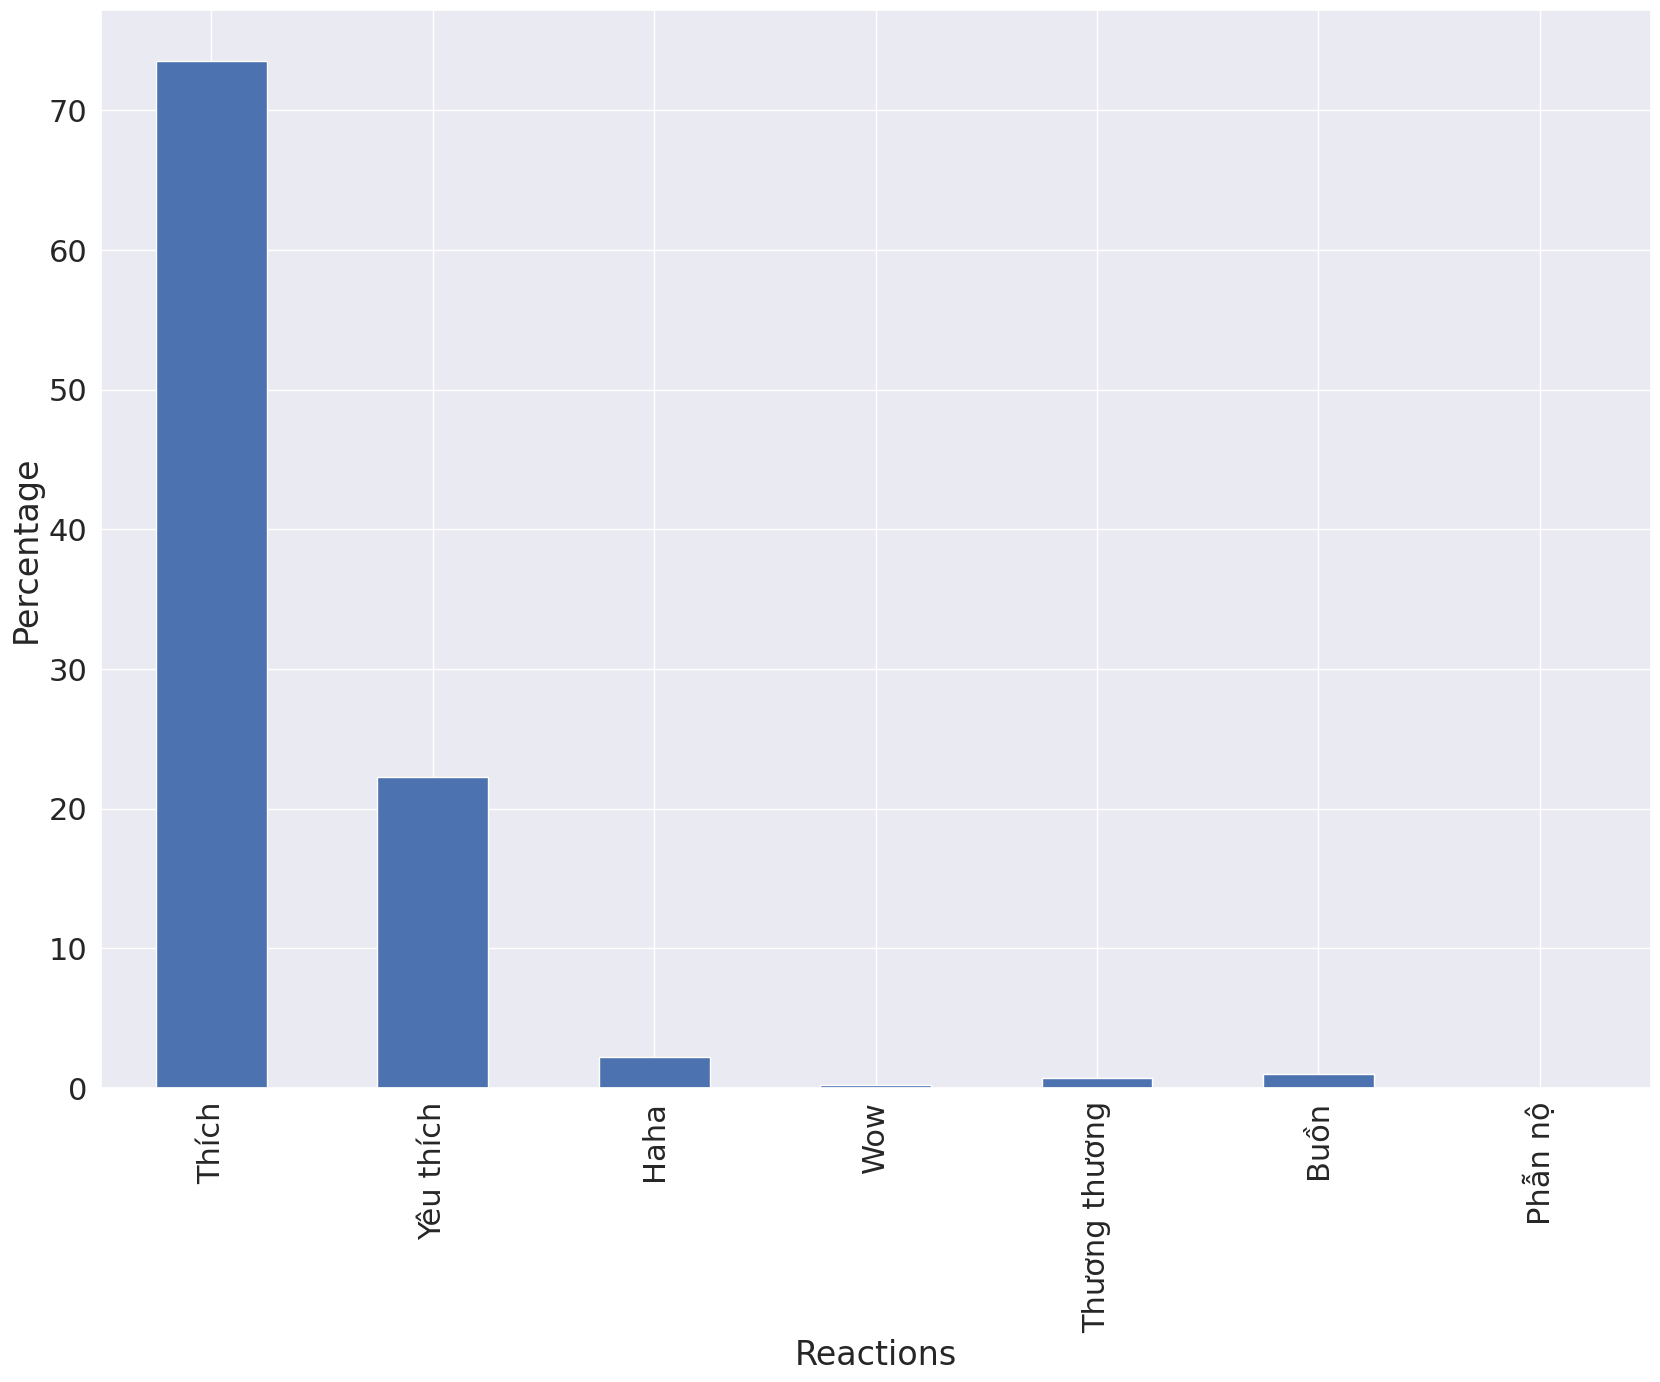

In [73]:
p = s['Phần trăm (%)'].plot(kind='bar', figsize=(20,14))
p.set_xlabel('Reactions')
p.set_ylabel('Percentage')
p

Số lượt chia sẻ trung bình mỗi bài viết

In [74]:
cleaned_data['shares'].mean()

21.56140350877193

Số lượt comment trung bình mỗi bài viết

In [75]:
cleaned_data['comments'].mean()

81.39473684210526

Bài đăng có nhiều lượt tương tác nhất 

In [76]:
highest_reaction_post = sorted_data.iloc[0]
highest_reaction_post

post_id                                                 685739823584420
post_text                                                  No post text
text                                                                NaN
images_description                          ['May be an image of text']
comments                                                            114
shares                                                               18
comments_full         [{'comment_id': '6464439700339100', 'comment_u...
reactors              [{'name': 'Dương Ngọc Lan', 'link': 'https://f...
reactions             {'like': 4753, 'love': 1771, 'haha': 26, 'wow'...
reaction_count                                                     6617
was_live                                                          False
Day                                                                  06
Month                                                                 9
Date                                                         202

Nội dung bài viết

In [77]:
highest_reaction_post['post_text']

'No post text'

In [78]:
highest_reaction_post['images_description']

"['May be an image of text']"

Số lượt tương tác 

In [79]:
highest_reaction_post['reaction_count']

6617

In [80]:
highest_reaction_post['reactions']

"{'like': 4753, 'love': 1771, 'haha': 26, 'wow': 7, 'care': 44, 'sad': 15, 'angry': 1}"

In [81]:
first_row = highest_reaction_post
reactions = dict(eval(first_row['reactions']))
reactions["shares"] = first_row['shares']
reactions["comments"] = first_row['comments']
reactions


{'like': 4753,
 'love': 1771,
 'haha': 26,
 'wow': 7,
 'care': 44,
 'sad': 15,
 'angry': 1,
 'shares': 18,
 'comments': 114}

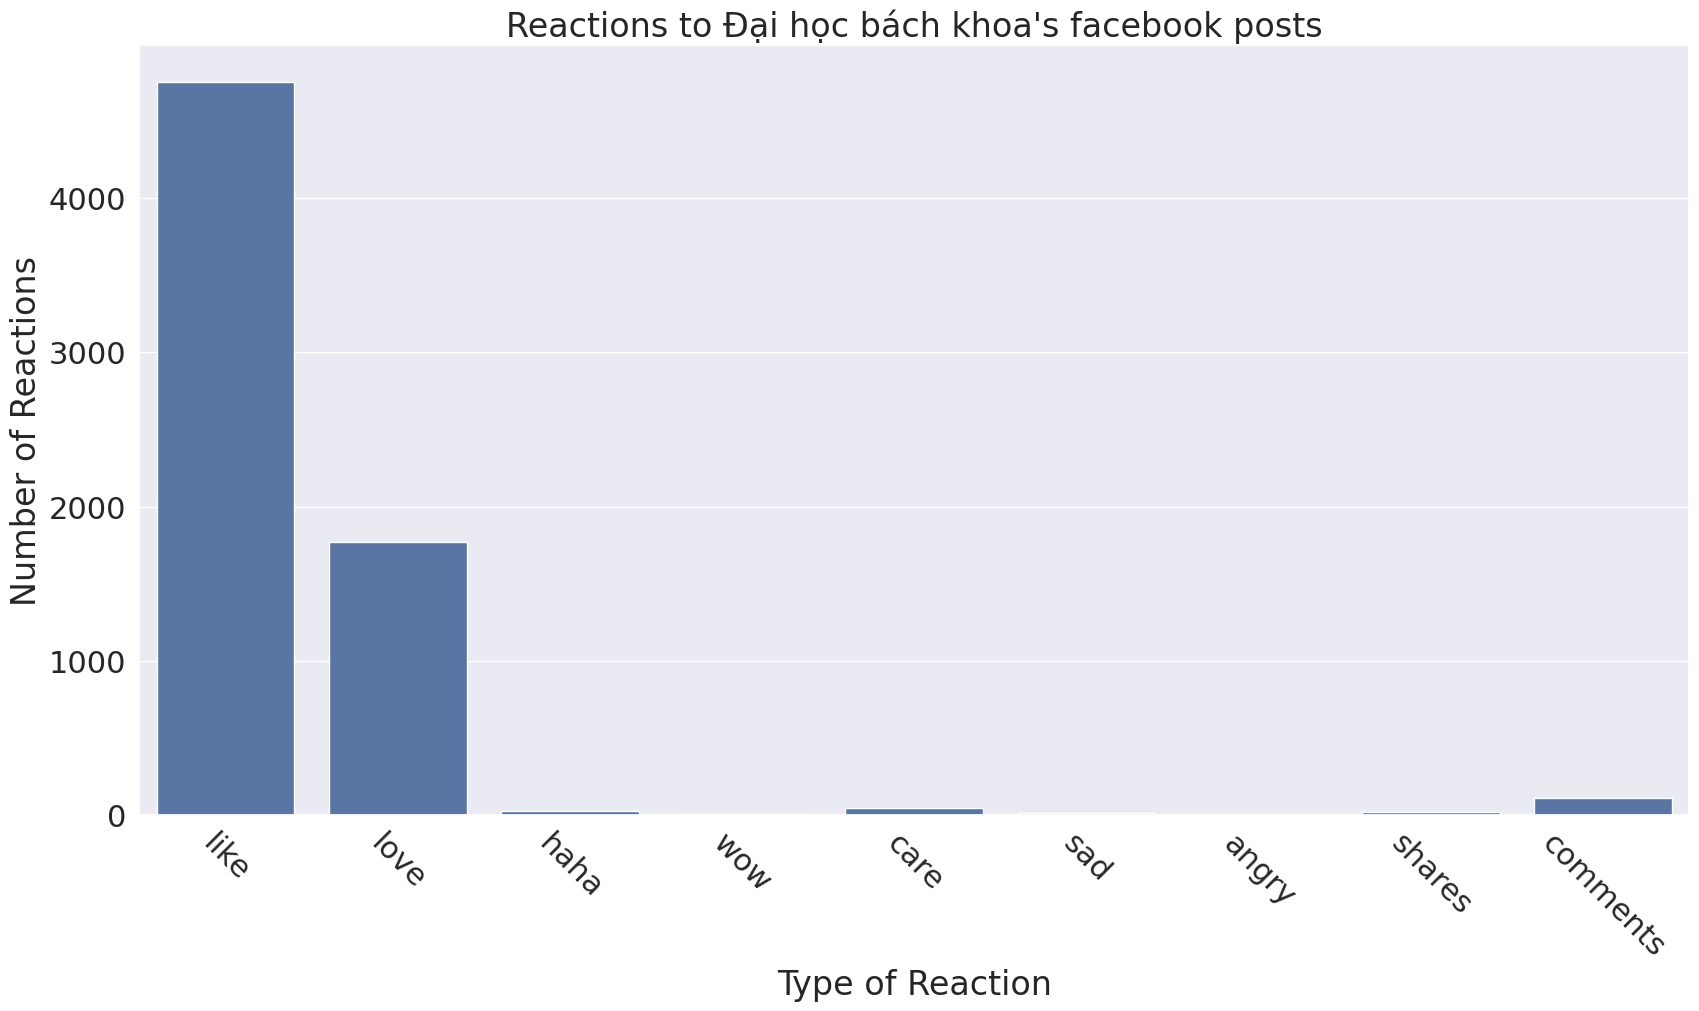

In [82]:
sns.set_theme(style="whitegrid")
sns.set(rc={'figure.figsize':(20,10)})
sns.set(font_scale=2)
# plot the reactions
fig, ax = plt.subplots()
ax = sns.barplot(x=list(reactions.keys()), y=list(reactions.values()))
ax.set_title("Reactions to Đại học bách khoa's facebook posts")
ax.set_ylabel("Number of Reactions")
ax.set_xlabel("Type of Reaction")
plt.xticks(rotation=-45)
plt.show()

Thống kê thời gian đăng bài của 5 bài viết có nhiều lượt tương tác nhất 

In [83]:
sorted_data.head(5).Time

95     03:24:12
44     01:00:09
107    14:31:57
112    00:01:04
48     12:52:54
Name: Time, dtype: object

Bài viết có nhiều lượt comment nhất

In [84]:
sort_by_cm = cleaned_data.sort_values(by = 'comments', ascending=False)
sort_by_cm.head(1)

,post_id,post_text,text,images_description,comments,shares,comments_full,reactors,reactions,reaction_count,...,Date,Time,Hour,Thích,Yêu_thích,Haha,Wow,Thương_thương,Buồn,Phẫn_nộ
112,1358907194696015,LỄ TỐT NGHIỆP ĐẠI HỌC CHÍNH QUY NĂM 2023 ( PHI...,LỄ TỐT NGHIỆP ĐẠI HỌC CHÍNH QUY NĂM 2023 ( PHI...,No photo description available,988,272,"[{'comment_id': '823626852603976', 'comment_ur...","[{'name': 'Quang Thao Phan', 'link': 'https://...","{'like': 2804, 'love': 1257, 'haha': 12, 'wow'...",4105,...,2023-08-26,00:01:04,0,2804,1257,12,9,21,1,1


Bài viết có nhiều lượt share nhất

In [85]:
sort_by_shares = cleaned_data.sort_values(by = 'shares', ascending=False)
sort_by_shares.head(1)

,post_id,post_text,text,images_description,comments,shares,comments_full,reactors,reactions,reaction_count,...,Date,Time,Hour,Thích,Yêu_thích,Haha,Wow,Thương_thương,Buồn,Phẫn_nộ
112,1358907194696015,LỄ TỐT NGHIỆP ĐẠI HỌC CHÍNH QUY NĂM 2023 ( PHI...,LỄ TỐT NGHIỆP ĐẠI HỌC CHÍNH QUY NĂM 2023 ( PHI...,No photo description available,988,272,"[{'comment_id': '823626852603976', 'comment_ur...","[{'name': 'Quang Thao Phan', 'link': 'https://...","{'like': 2804, 'love': 1257, 'haha': 12, 'wow'...",4105,...,2023-08-26,00:01:04,0,2804,1257,12,9,21,1,1


In [86]:
sort_by_cm.info()

<class 'pandas.core.frame.DataFrame'>
Index: 114 entries, 112 to 40
Data columns (total 23 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   post_id             114 non-null    int64 
 1   post_text           114 non-null    object
 2   text                113 non-null    object
 3   images_description  114 non-null    object
 4   comments            114 non-null    int64 
 5   shares              114 non-null    int64 
 6   comments_full       114 non-null    object
 7   reactors            114 non-null    object
 8   reactions           114 non-null    object
 9   reaction_count      114 non-null    int64 
 10  was_live            114 non-null    bool  
 11  Day                 114 non-null    object
 12  Month               114 non-null    int64 
 13  Date                114 non-null    object
 14  Time                114 non-null    object
 15  Hour                114 non-null    int64 
 16  Thích               114 non-nu

In [87]:
sort_by_shares.iloc[0].text

'LỄ TỐT NGHIỆP ĐẠI HỌC CHÍNH QUY NĂM 2023 ( PHIÊN 1)\n\nThời gian: 08h00-12h30\nĐịa điểm: Hội trường A2 - Trường Đại học Kinh tê Quốc dân.'

In [88]:
sort_by_cm.head(1).was_live

112    True
Name: was_live, dtype: bool

Số lượng bài viết trong 3 tháng gần nhất

Text(0, 0.5, 'Số lượng bài viết')

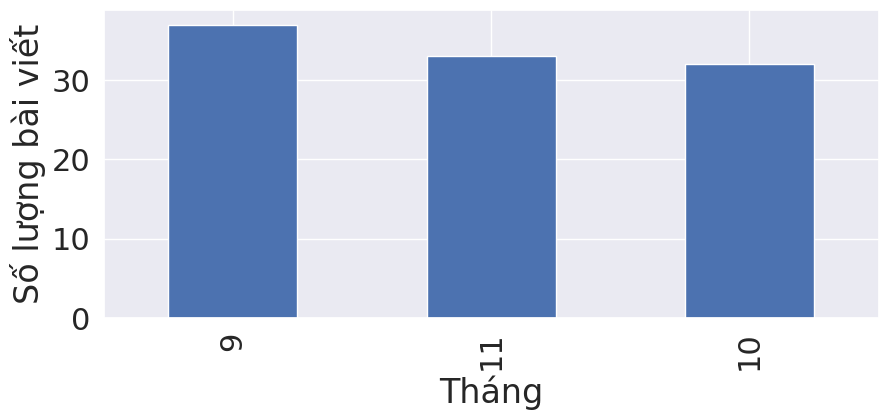

In [89]:
m = cleaned_data.loc[cleaned_data['Month'] > 8].Month.value_counts()
bp = m.plot(kind='bar', figsize=(10,4))
bp.set_xlabel("Tháng")
bp.set_ylabel("Số lượng bài viết")

In [90]:
len(cleaned_data.loc[cleaned_data['Month'] == 9])

37

In [91]:
len(cleaned_data.loc[cleaned_data['Month'] == 10])

32

In [92]:
len(cleaned_data.loc[cleaned_data['Month'] == 11])

33

Thống kê lượng bài viết theo đăng bài 

Text(0, 0.5, 'Số bài đăng')

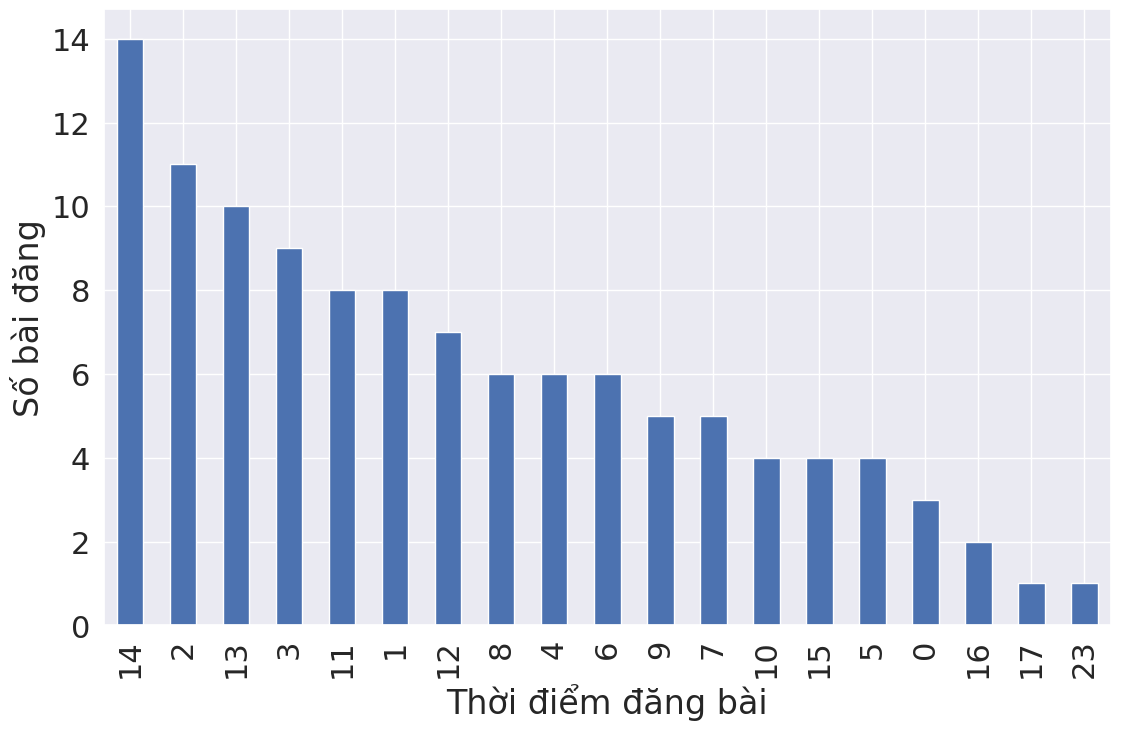

In [93]:
h = cleaned_data['Hour'].value_counts()
t = h.plot(kind = 'bar', figsize=(13,8))
t.set_xlabel('Thời điểm đăng bài')
t.set_ylabel('Số bài đăng')

<Axes: >

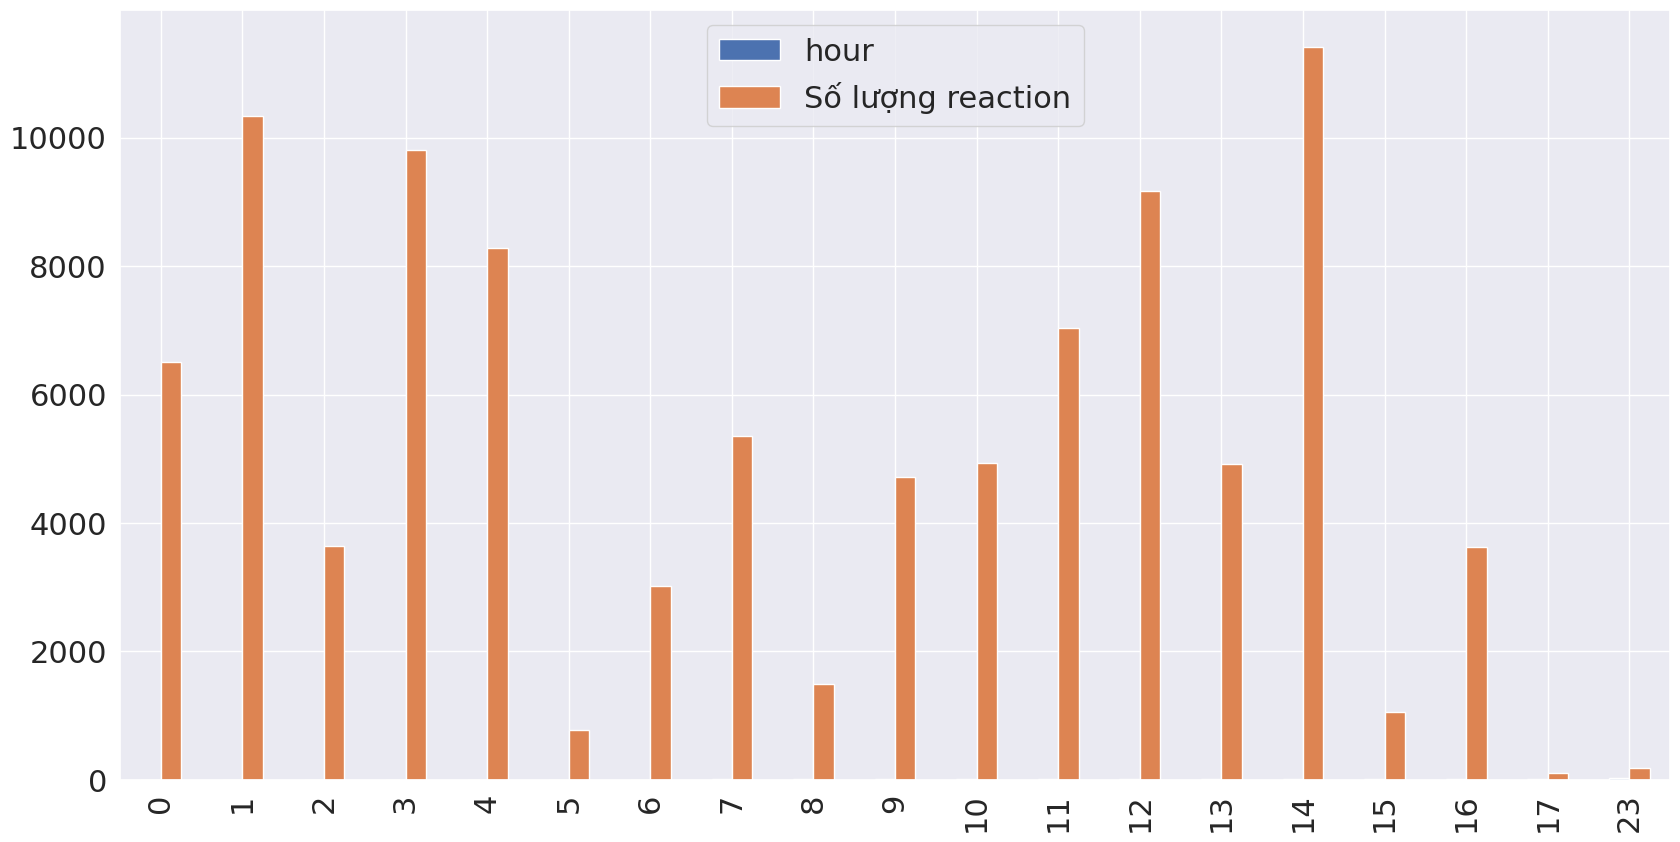

In [94]:
h = cleaned_data["Hour"].unique()
reaction_by_h = []
for i in h:
    tem = sum(cleaned_data.loc[cleaned_data['Hour'] == i].reaction_count)
    reaction_by_h.append(tem)
rh = pd.DataFrame()
rh['hour'] = h
rh['Số lượng reaction'] = reaction_by_h
rh.index = h
rh.sort_values(by = 'hour', ascending = True).plot(kind = "bar")

Lượng tương tác theo từng tháng 


In [95]:
month = [9,10,11]
react = ['Thích','Yêu_thích', 'Haha', 'Wow', 'Thương_thương', 'Buồn', 'Phẫn_nộ', 'shares', 'comments']
month_9 = []
month_10 = []
month_11 = []
for i in month:
    for j in react:
        t = sum(cleaned_data.loc[cleaned_data['Month'] == i][j])
        if i == 9:
            month_9.append(t)
        elif i == 10:
            month_10.append(t)
        else:
            month_11.append(t)

In [96]:
month_data = pd.DataFrame({'Tháng_9' : month_9, 'Tháng_10' : month_10, 'Tháng_11' : month_11})
month_data.index = react
month_data = month_data.transpose()
month_data

,Thích,Yêu_thích,Haha,Wow,Thương_thương,Buồn,Phẫn_nộ,shares,comments
Tháng_9,23583,6408,175,67,201,480,3,608,2204
Tháng_10,18332,5788,175,59,199,26,0,520,2136
Tháng_11,16348,5289,1044,70,223,129,1,529,1959


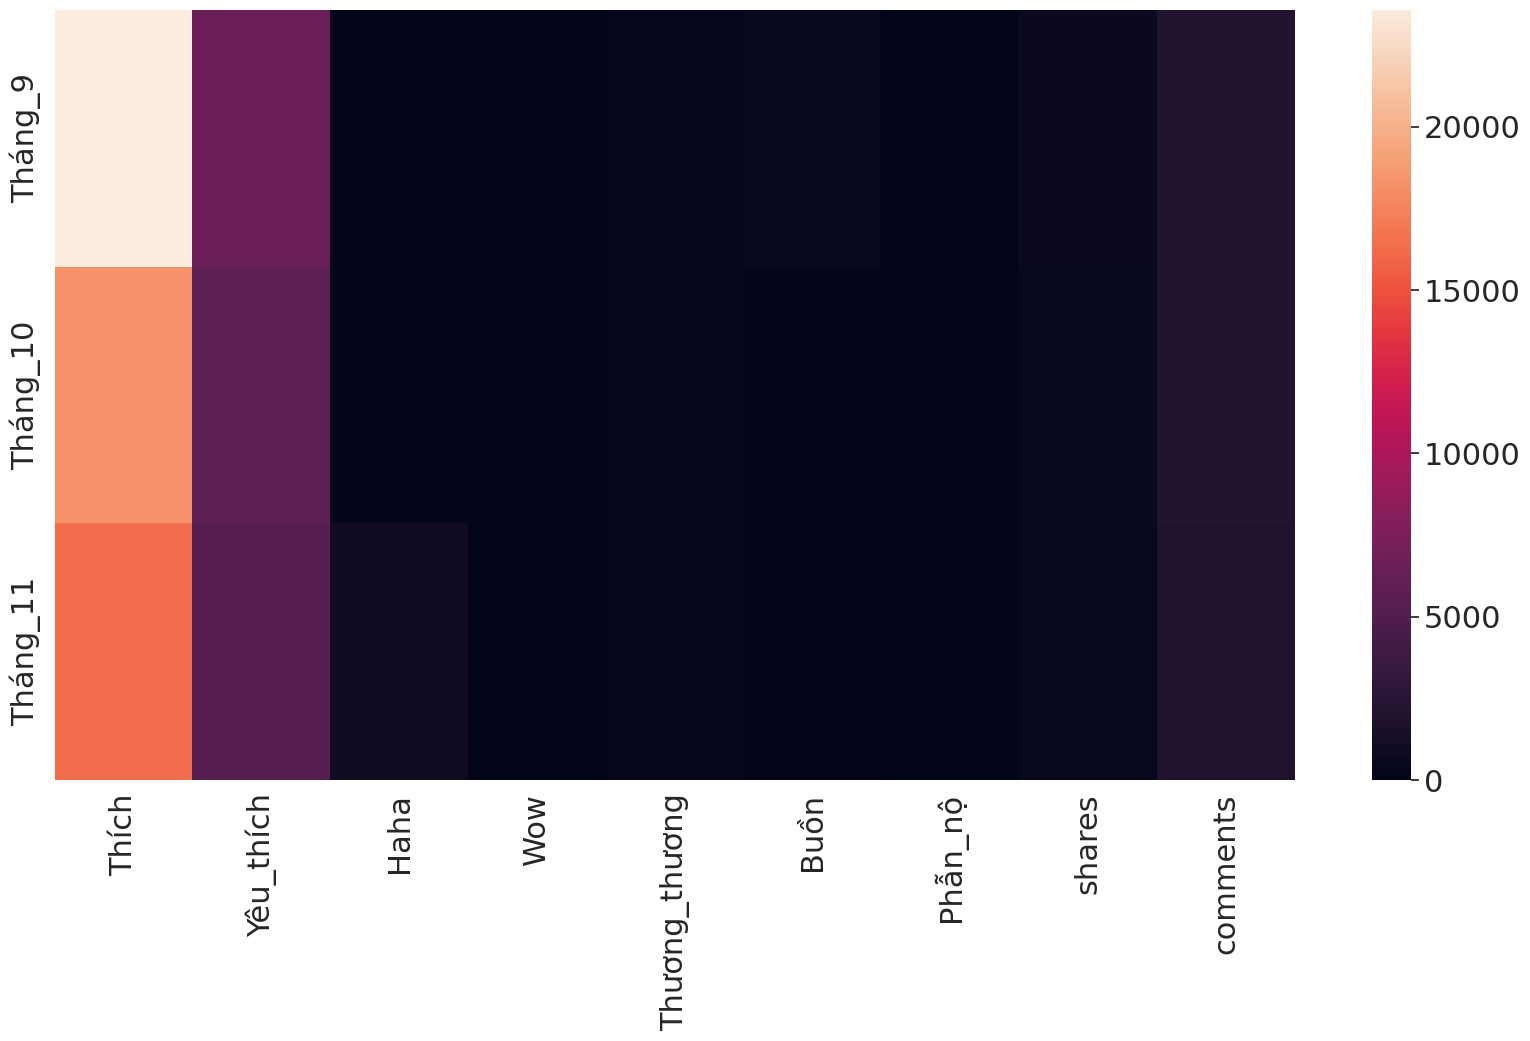

In [97]:
display_sample = sns.heatmap(month_data)

<Axes: >

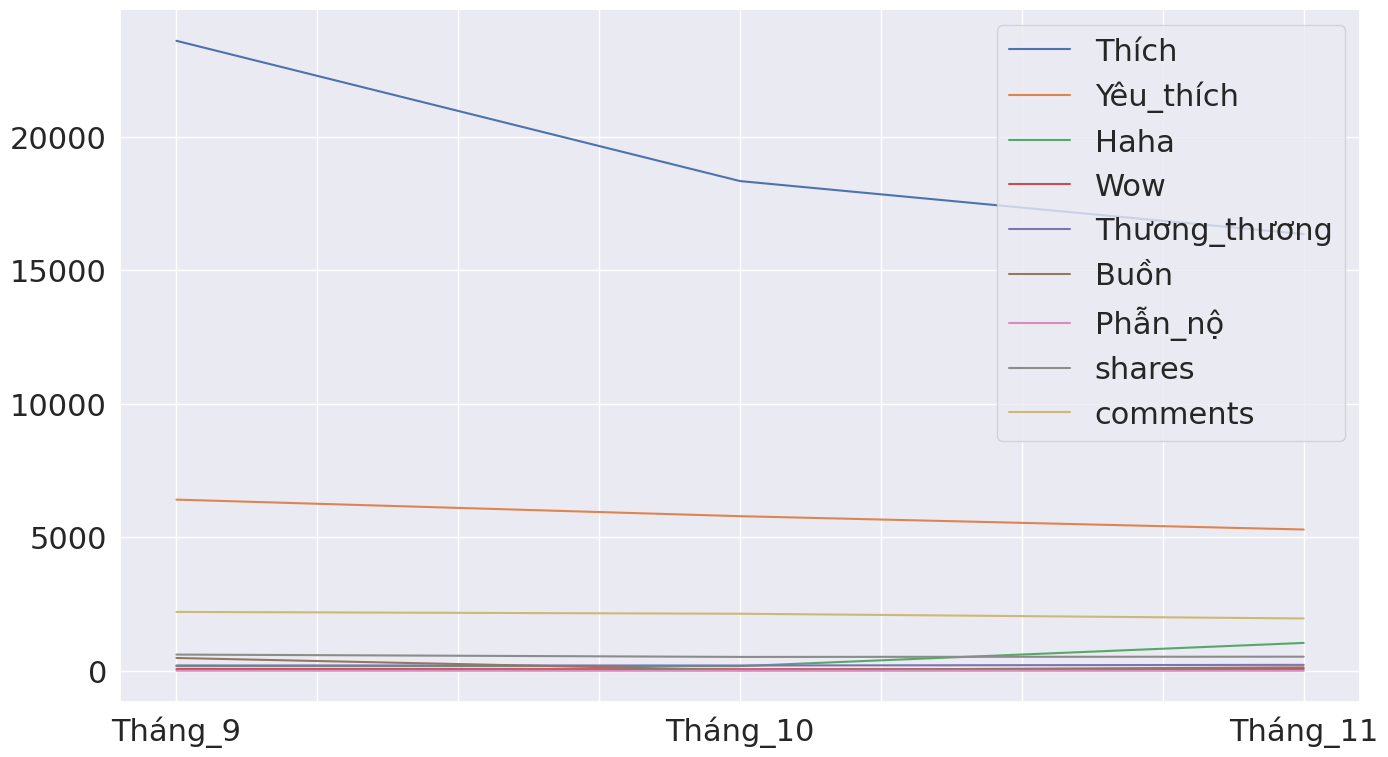

In [98]:
month_data.plot(figsize=(16,9))

In [99]:
cleaned_data['Date'].value_counts()

Date
2023-11-11    6
2023-09-28    4
2023-10-11    4
2023-09-24    3
2023-10-06    3
             ..
2023-10-22    1
2023-10-20    1
2023-10-19    1
2023-10-16    1
2023-08-25    1
Name: count, Length: 67, dtype: int64

In [100]:
j = pd.DataFrame(cleaned_data['Date'].value_counts()).sort_index()

Text(0, 0.5, 'Số bài đăng')

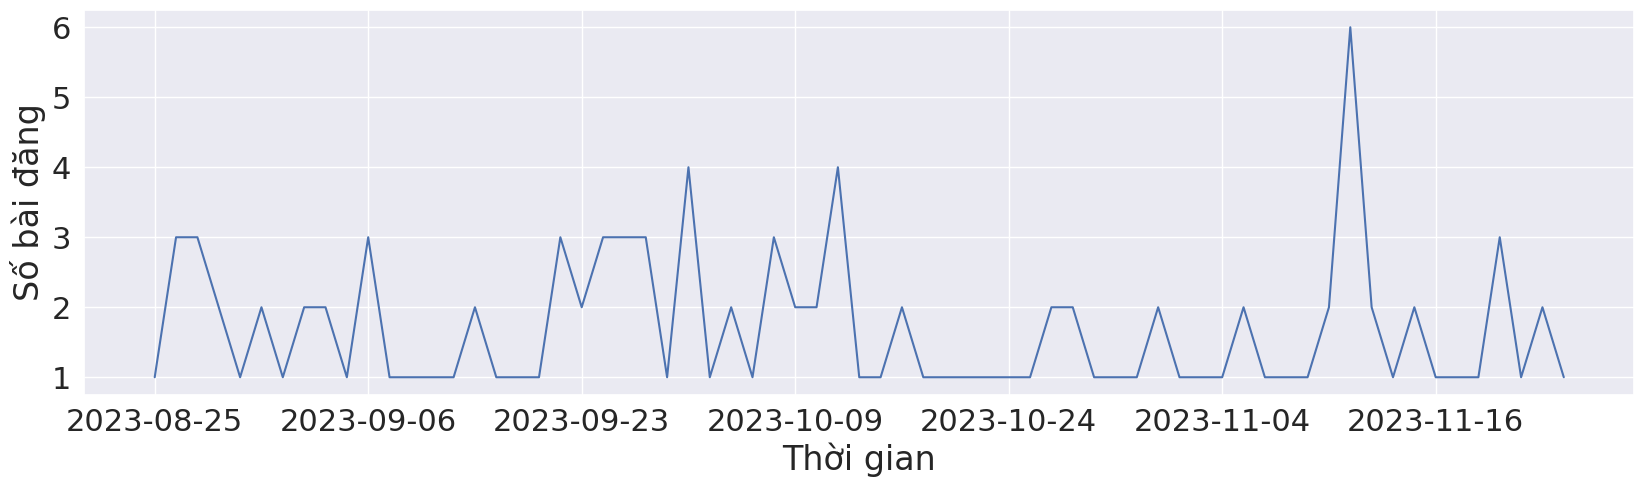

In [101]:
x = j.index.to_list()
y = j['count'].to_list()
fig = plt.figure(figsize=(20, 5))
ax = fig.add_subplot()
ax.plot(x, y)
ax.set_xticks(np.arange(0, 10 * 7, 10))
ax.set_xlabel('Thời gian')
ax.set_ylabel('Số bài đăng')

In [102]:
cleaned_data['Date'].value_counts().mean()

1.7014925373134329

Phân tích về người bình luận 

In [103]:
'''
commenter_name
commenter_id
comment_text
'''
import re
commenter_name = []
commenter_id = []
comment_text = []
for i in cleaned_data['comments_full']:
    input_string = i
    s = input_string.split(",")
    for i in s:
        data_string = i
        match_commenter_id = re.search(r"'commenter_id': '(\d+)'", data_string)
        match_commenter_name = re.search(r"'commenter_name': '([^']+)'", data_string)
        match_comment_text = re.search(r"'comment_text': '([^']+)'", data_string)
        if match_commenter_id:
            id = match_commenter_id.group(1)
            commenter_id.append(id)
        elif match_commenter_name:
            name = match_commenter_name.group(1)
            commenter_name.append(name)   
        elif match_comment_text:
            text = match_comment_text.group(1)
            comment_text.append(text)   

In [104]:
'''
profiles = []
for i in range (len(commenter_id)):
    try:
        u = get_profile(str(commenter_id[i]))
        profiles.append(u)
        print("Added profile no" + str(len(profiles)))
    except:
        continue
'''        

'\nprofiles = []\nfor i in range (len(commenter_id)):\n    try:\n        u = get_profile(str(commenter_id[i]))\n        profiles.append(u)\n        print("Added profile no" + str(len(profiles)))\n    except:\n        continue\n'

In [105]:
#len(profiles)

Các từ có tần xuất xuất hiện nhiều trong các bài viết

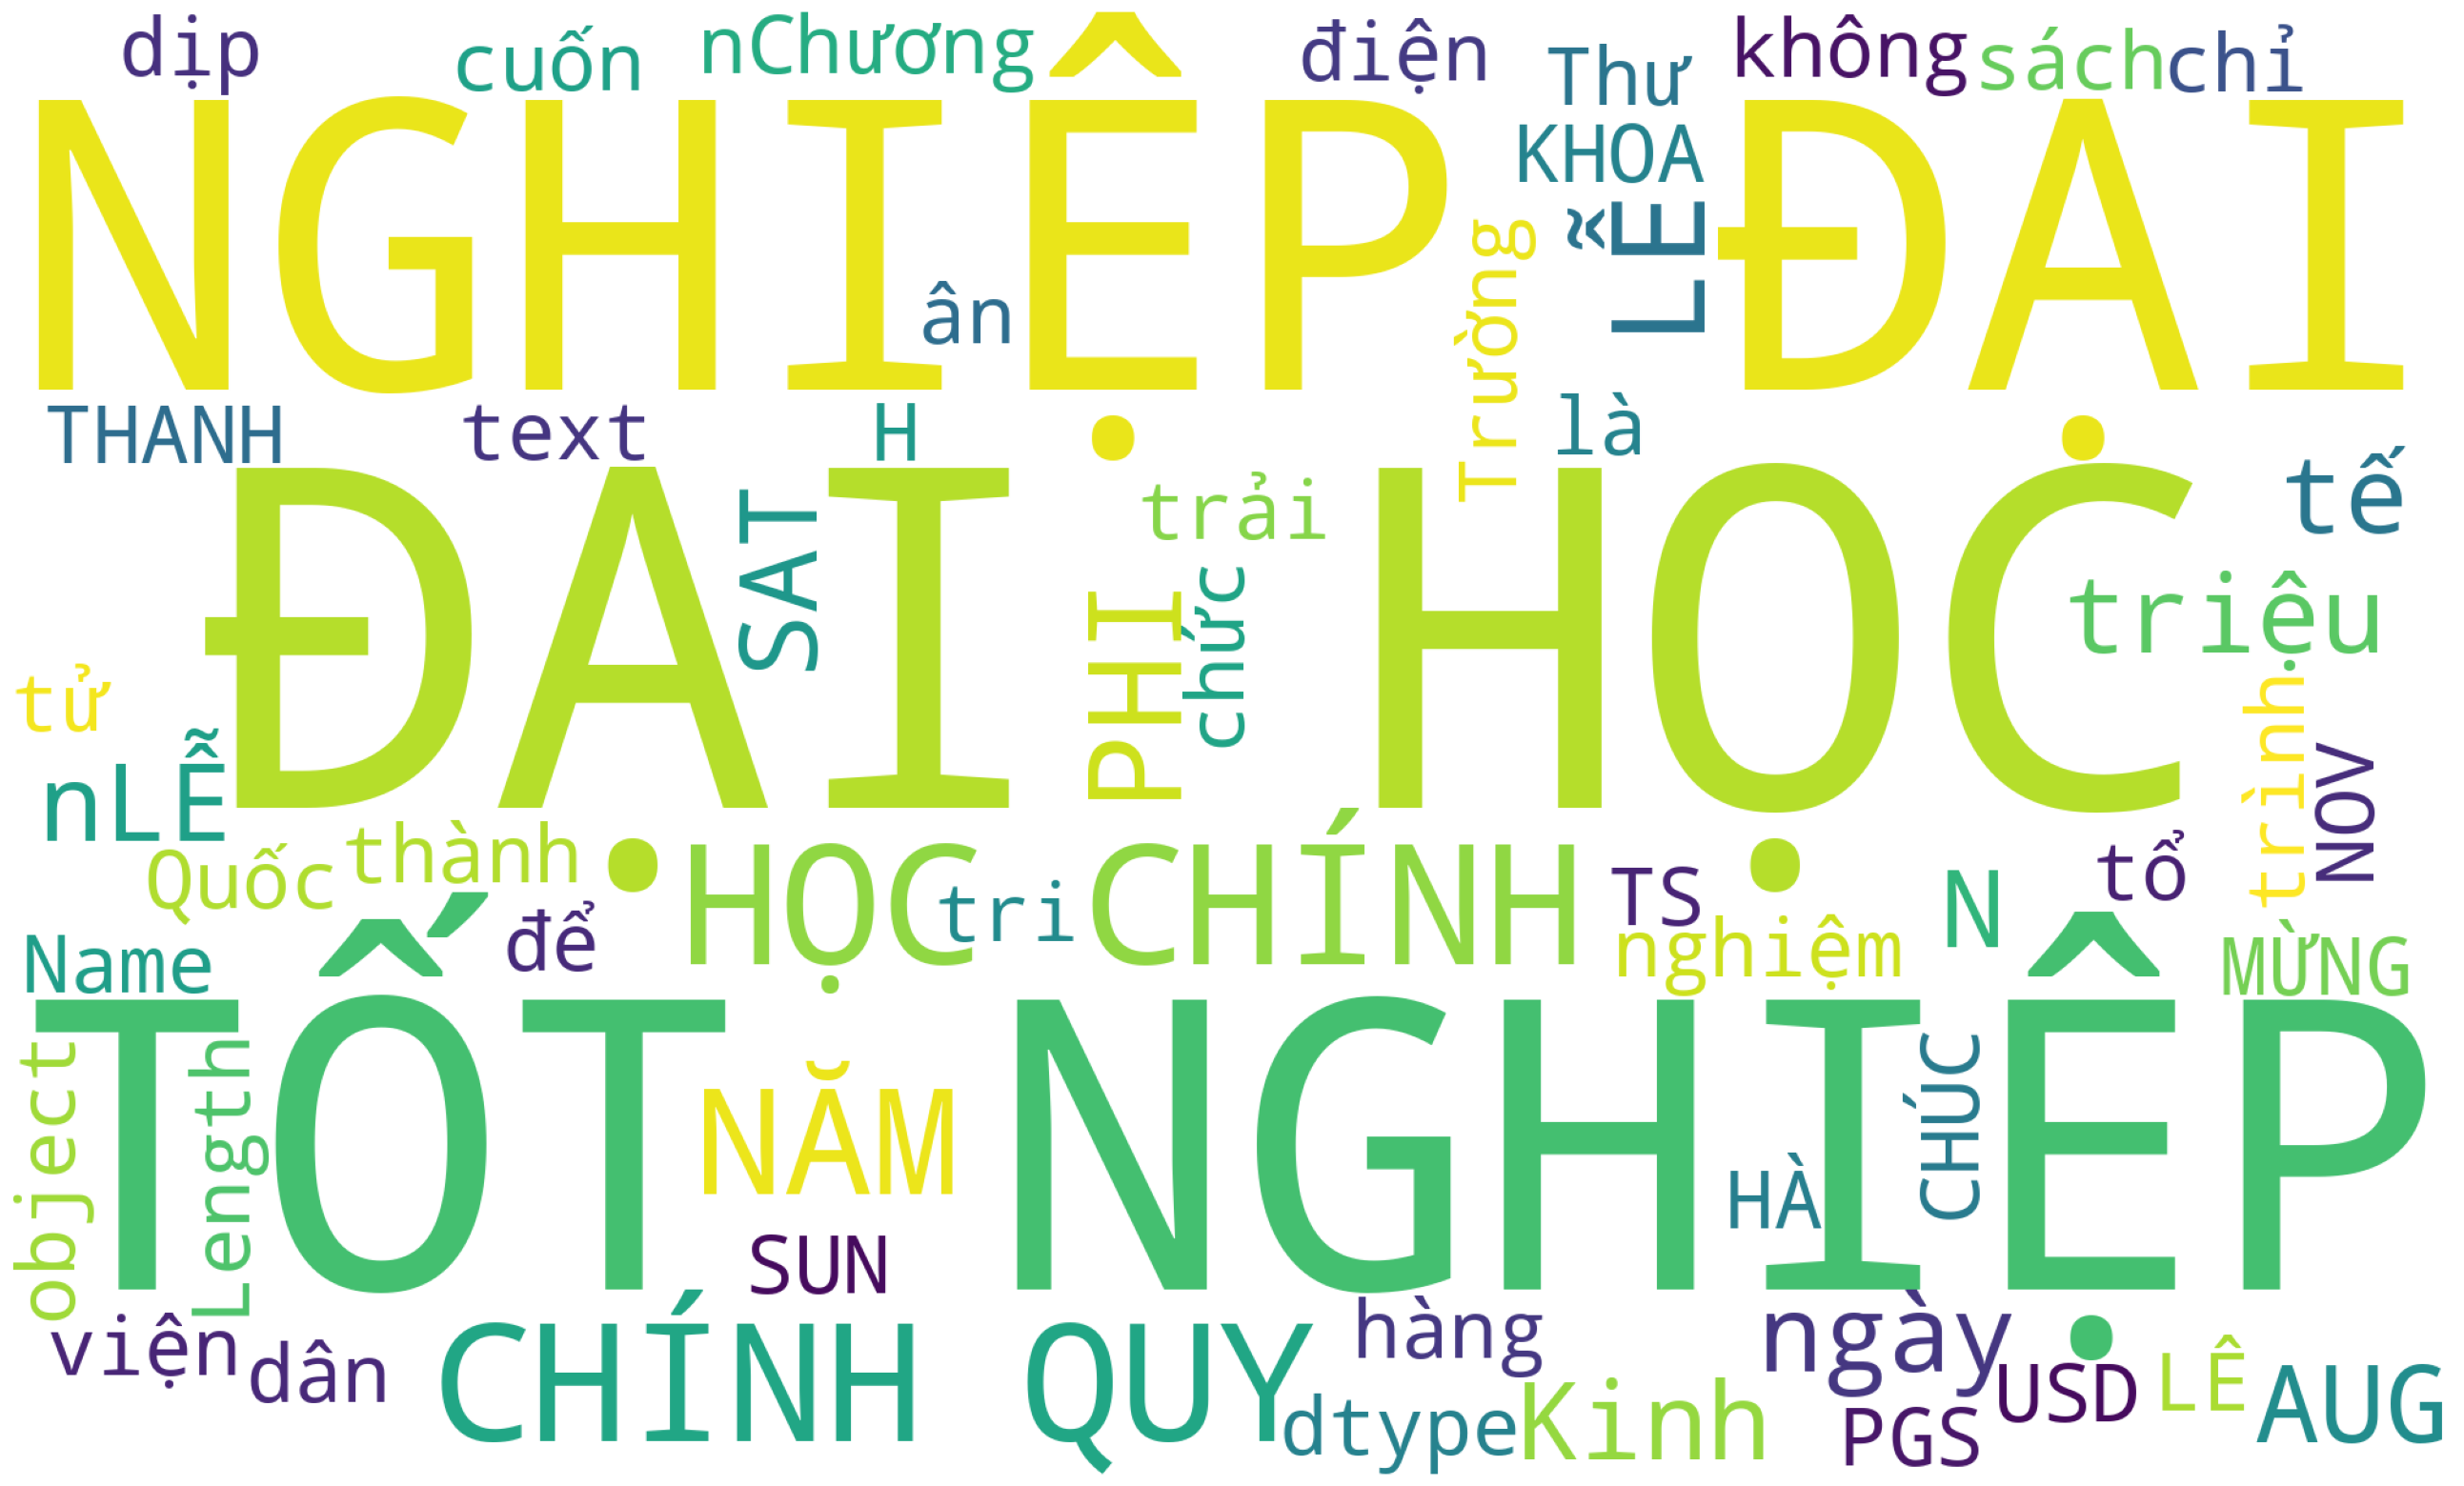

In [106]:
from wordcloud import WordCloud, STOPWORDS

text = str(cleaned_data['text'])
wordcloud = WordCloud(stopwords=STOPWORDS,
                          background_color='white', 
                      max_words=300,
                      width=2000, height=1200
                         ).generate(text)
plt.figure(figsize=(40,20))
plt.clf()
plt.imshow(wordcloud)
plt.axis('off')
plt.show()


<Axes: xlabel='0'>

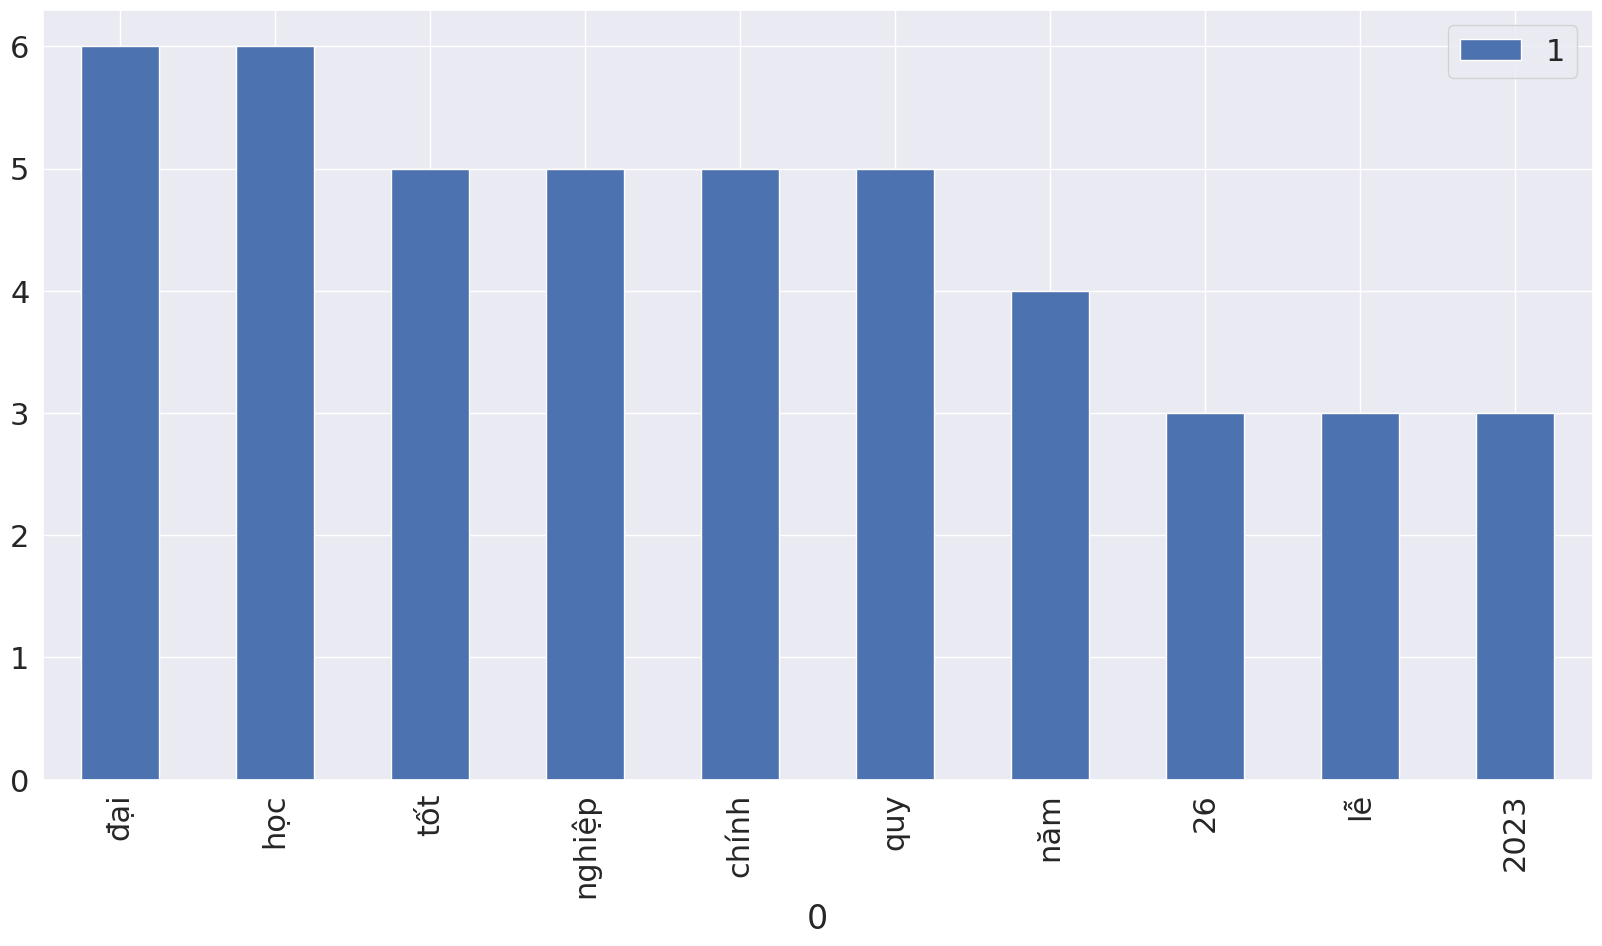

In [107]:
from collections import Counter
def thong_ke_tan_suat_tu(bai_viet):
    words = re.findall(r'\b\w+\b', bai_viet.lower())
    tan_suat = Counter(words)
    return tan_suat
f = thong_ke_tan_suat_tu(text)
top_10 = f.most_common(10)
t10 = pd.DataFrame(top_10)
t10.index = t10[0]
t10.plot(kind='bar')

Các từ có tần xuất xuất hiện nhiều trong các bình luận 

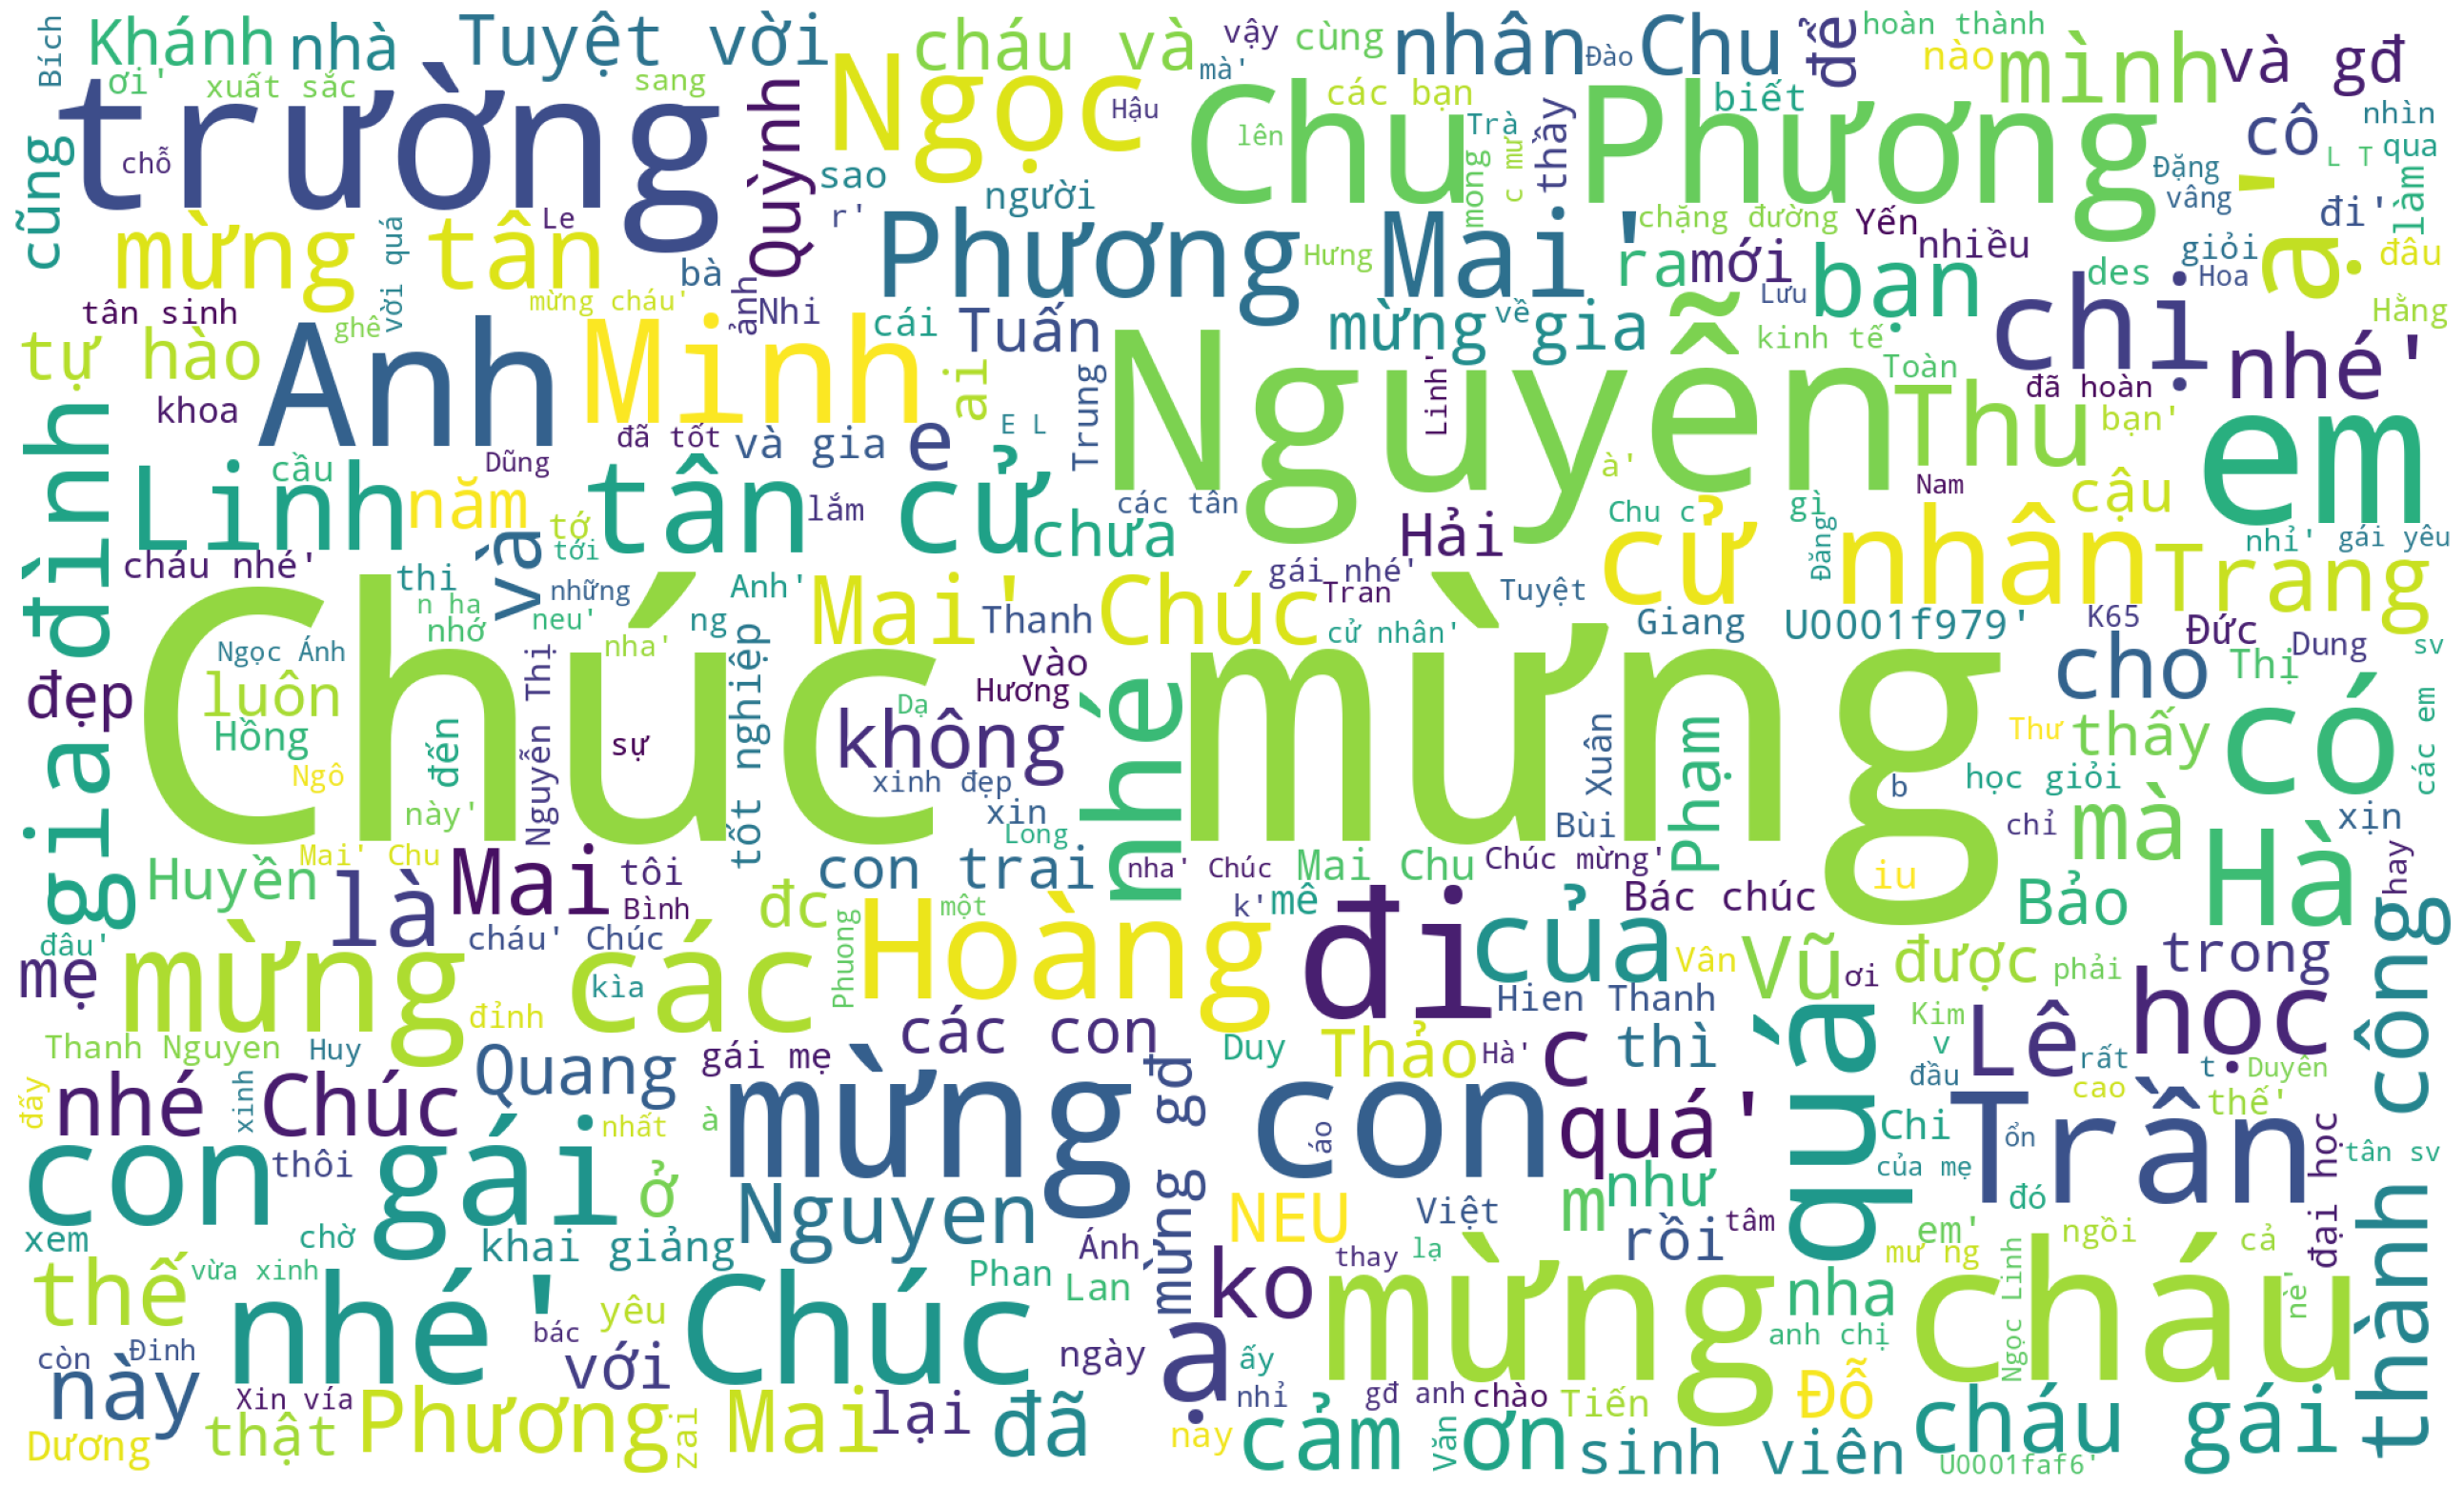

In [108]:
commnent = str(comment_text)
wordcloud = WordCloud(stopwords=STOPWORDS,
                          background_color='white', 
                      max_words=300,
                      width=2000, height=1200
                         ).generate(commnent)
plt.figure(figsize=(40,20))
plt.clf()
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

<Axes: xlabel='0'>

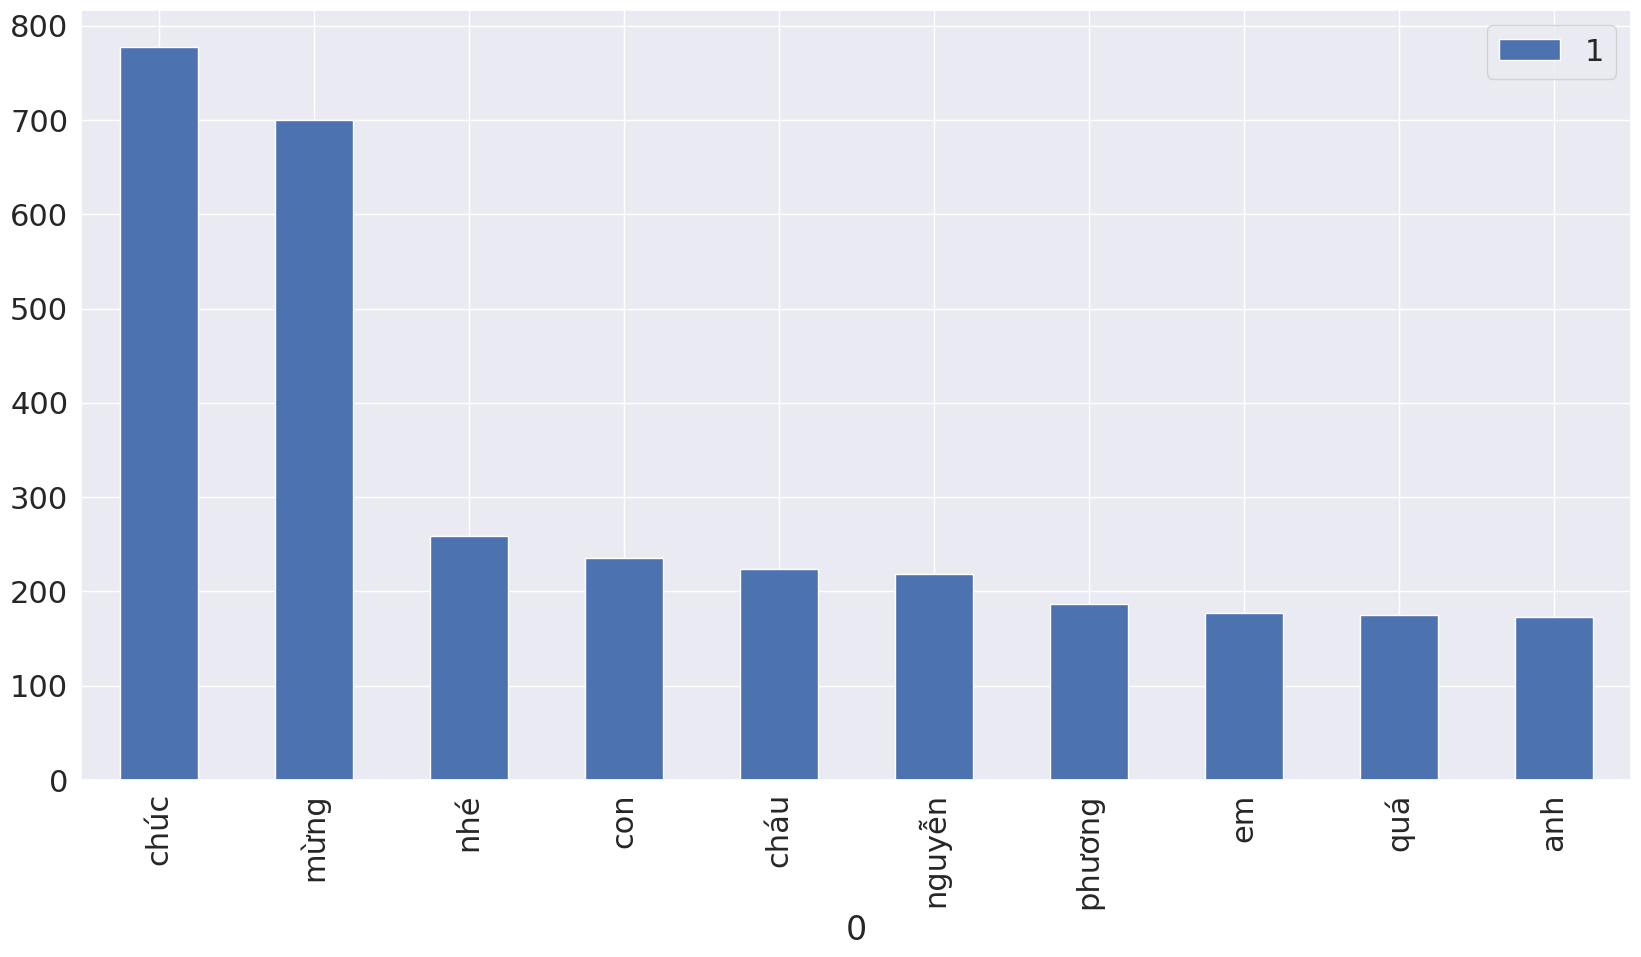

In [109]:
f1 = thong_ke_tan_suat_tu(commnent)
top_10w = f1.most_common(10)
t10w = pd.DataFrame(top_10w)
t10w.index = t10w[0]
t10w.plot(kind='bar')

Mô hình và dự đoán 

In [110]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

In [111]:
feature_cols = feature_cols = ['Thích','Yêu_thích','shares', 'comments']
X = cleaned_data[feature_cols].values
y = cleaned_data.reaction_count.values

In [112]:
print(X.shape)
print(y.shape)
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.1, random_state=0)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(114, 4)
(114,)
(102, 4)
(12, 4)
(102,)
(12,)


In [113]:
knn_model = KNeighborsClassifier(n_neighbors=3)
knn_model.fit(X_train, y_train)

# Bước 4: Dự đoán
y_pred = knn_model.predict(X_test)

# Bước 5: Đánh giá mô hình (ví dụ: sử dụng accuracy_score)
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_test, y_pred)


In [114]:
y_pred

array([ 544, 1083,  335,  472,  189,  120,  182, 1564, 2490,   78, 3278,
       1083])

In [115]:
y_test

array([ 706, 1118,  338,  533,  204,  133,  178, 2032, 3158,   89, 3900,
       1151])

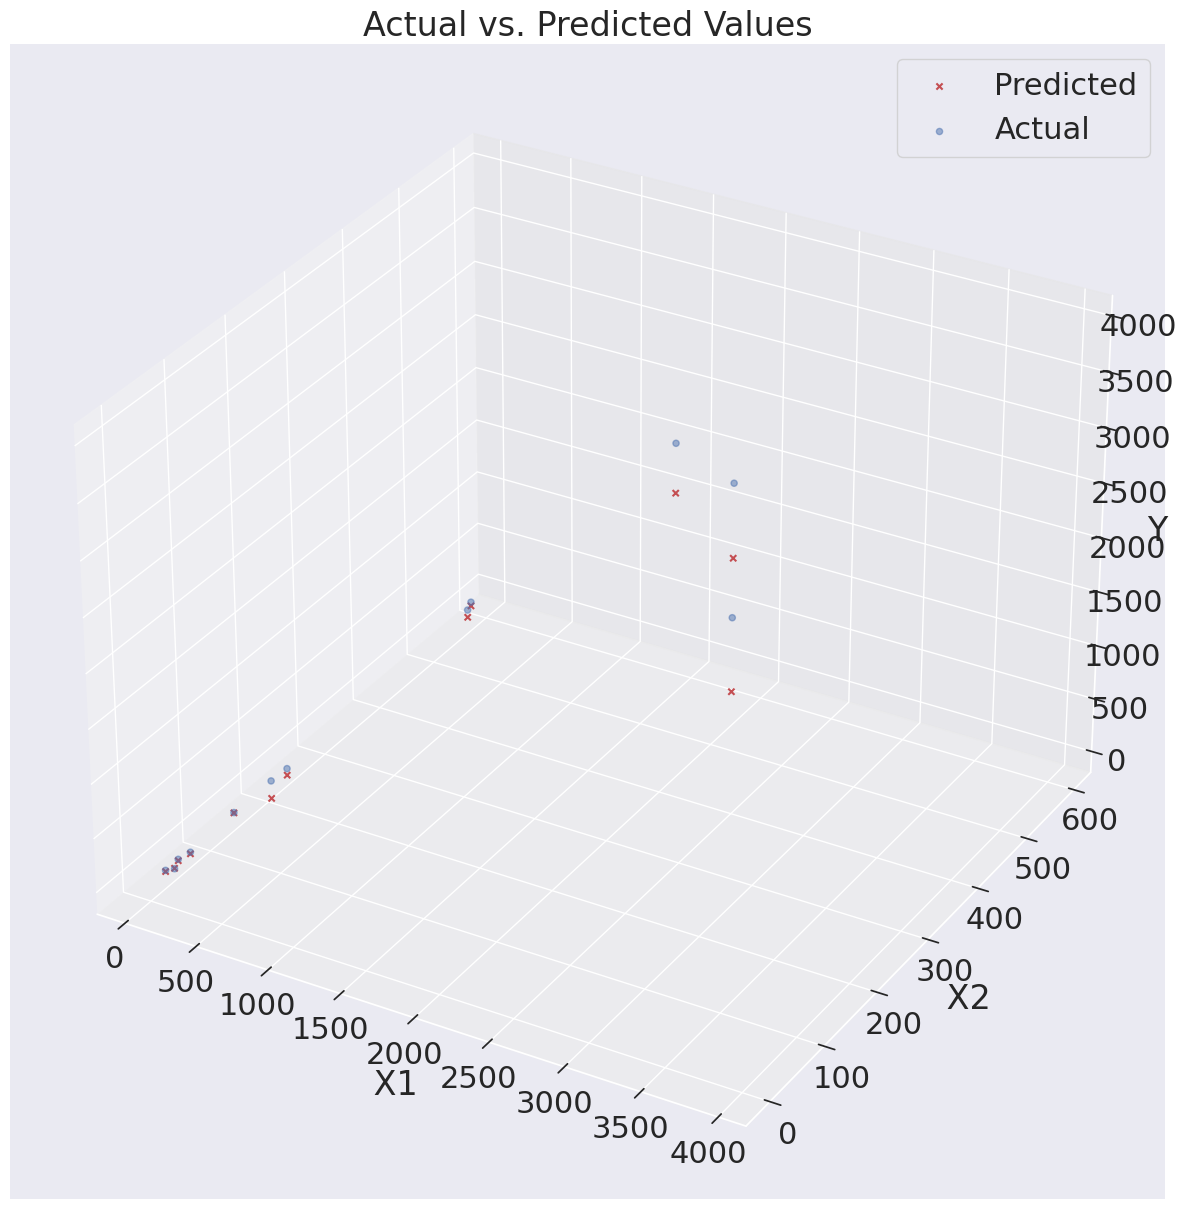

In [116]:
# Let plot two of our features against our target variable:

fig = plt.figure(figsize=(20,15))
ax = fig.add_subplot(111, projection='3d')

# Scatter plot for the predicted values
ax.scatter(X_test[:, 0], X_test[:, 1], y_pred, c='r', marker='x', label='Predicted', alpha=1)

# Scatter plot for the original data
ax.scatter(X_test[:, 0], X_test[:, 1], y_test, c='b', marker='o', label='Actual', alpha=0.5)

ax.set_xlabel("\n" + ' X1')
ax.set_ylabel("\n" + ' X2')
ax.set_zlabel('Y')
plt.title("Actual vs. Predicted Values")
plt.legend()
plt.show()